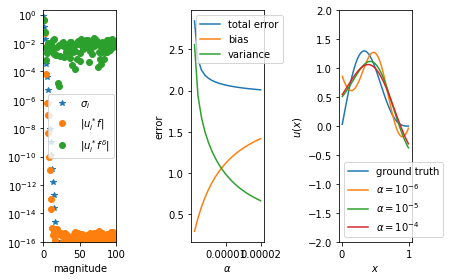

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# define forward operator
def getK(n):
    h = 1/n;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = h/(1 + (xx - yy)**2)**(3/2)

    return K,x

# parameters
np.random.seed(1)
n = 100
sigma = 1e-2
K,x = getK(n)

# define ground truth and compute data
u = np.sin(np.pi*x) + 0.5*np.sin(2*np.pi*x)
f = K@u

# add noise
noise = np.random.randn(n)
f_delta = f + sigma*noise

# SVD
U, s, Vh = np.linalg.svd(K, full_matrices=True)

# regularised pseudo inverse using Tikhonov
R_alpha = lambda alpha : Vh.T@np.diag(s/(s**2 + alpha))@U.T

# error, bias and variance for Tikhonov
na = 20
alpha = np.linspace(1e-6,2e-5,na)
error = np.zeros(na)
bias = np.zeros(na)
variance = np.zeros(na)

for k in range(na):
    error[k] = np.linalg.norm(u - R_alpha(alpha[k])@f_delta)
    bias[k] = np.linalg.norm(u - R_alpha(alpha[k])@f)
    variance[k] = np.linalg.norm(R_alpha(alpha[k])@(f-f_delta))

# plot
fig,ax = plt.subplots(1,3)

ax[0].semilogy(s,'*',label=r'$\sigma_i$')
ax[0].semilogy(np.abs(U.T@f),'o',label=r'$|u_i^* f|$')
ax[0].semilogy(np.abs(U.T@f_delta),'o',label=r'$|u_i^* f^{\delta}|$')
ax[0].set_xlabel(r'$i$')
ax[0].set_xlabel(r'magnitude')
ax[0].set_ylim([1e-16,2])
ax[0].set_xlim([0,n])
ax[0].legend()

ax[1].plot(alpha,error,label='total error')
ax[1].plot(alpha,bias,label='bias')
ax[1].plot(alpha,variance,label='variance')
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel(r'error')
ax[1].legend()

ax[2].plot(x,u,label='ground truth')
ax[2].plot(x,R_alpha(1e-6)@f_delta,label=r'$\alpha = 10^{-6}$')
ax[2].plot(x,R_alpha(1e-5)@f_delta,label=r'$\alpha = 10^{-5}$')
ax[2].plot(x,R_alpha(1e-4)@f_delta,label=r'$\alpha = 10^{-4}$')
ax[2].set_ylim([-2,2])
ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$u(x)$')
ax[2].legend()

fig.tight_layout()